In [1]:
using Markdown
using InteractiveUtils
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8171379500205386875\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7511150219175222563\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8171379500205386875\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
using Revise

In [3]:
# using Pkg
# Pkg.develop(PackageSpec(url="/home/users/shubhgup/Codes/julia_learn/scripts/AdversarialDriving.jl"))
# Pkg.add("Revise")

In [4]:
# using WebIO
# WebIO.install_jupyter_nbextension()

In [5]:
using Distributions, Parameters, Random, Latexify, PlutoUI

In [6]:
using AutomotiveSimulator, AutomotiveVisualization

In [7]:
using AdversarialDriving

┌ Info: Precompiling AdversarialDriving [0f7eb3e9-d51f-47f4-b915-6157e1c8ce29]
└ @ Base loading.jl:1278


In [8]:
using POMDPs, POMDPPolicies, POMDPSimulators

In [9]:
using POMDPStressTesting

In [10]:
Base.rand(rng::AbstractRNG, s::Scene) = s

### Function Definitions

In [ ]:
# # The function that propagates the PedestrianControl action
# function AdversarialDriving.propagate(ped::Entity{NoisyPedState, D, I}, action::PedestrianControl, roadway::Roadway, Δt::Float64) where {D, I}
#     starting_lane = laneid(ped)
#     vs_entity = Entity(ped.state.veh_state, ped.def, ped.id)
#     a_lat_lon = reverse(action.a + action.da)
#     vs = propagate(vs_entity, LatLonAccel(a_lat_lon...), roadway, Δt)
#     upd_noise = Noise((ped.state.noise.pos[1] + action.noise.pos[1] + action.noise.vel*Δt, action.noise.pos[2]), action.noise.vel)
#     nps = NoisyPedState(AdversarialDriving.set_lane(vs, laneid(ped), roadway), upd_noise)
#     @assert starting_lane == laneid(nps)
#     nps
# end

In [ ]:
# # The function to get GPS measurements for pedestrian, compute state estimate and update noise
# function measure_gps(ped::Entity{NoisyPedState, D, I}, fixed_sat::Array{Satellite}, noise::Array{Float64}) where {D, I}
#     ped_pos = posg(ped)
    
#     ranges = Union{Missing, GPSRangeMeasurement}[]
    
#     for i in 1:length(fixed_sat)
#         satpos = fixed_sat[i].pos
#         if fixed_sat[i].visible==true
#             range = hypot(ped_pos.x - satpos.x, ped_pos.y - satpos.y, satpos.z)
#             push!(ranges, GPSRangeMeasurement(range=range, noise=noise[i]))
#         else
#             push!(ranges, missing)
#         end
#     end
    
#     ranges
# end

In [ ]:
# measure_gps(ped_state, fixed_sat, [0.0, 0.0, 0.0, 0.0])

In [ ]:
# function update_all_measurements(ped::Entity{NoisyPedState, D, I}, all_measurements) where {D, I}
#     single_time_measurements = Array{Measurement}[] 
# end

In [ ]:
# # Instructions for rendering the noisy pedestrian
# function AutomotiveVisualization.add_renderable!(rendermodel::RenderModel, ped::Entity{NoisyPedState, VehicleDef, Int64})
#     reg_ped = Entity(ped.state.veh_state, ped.def, ped.id)
#     add_renderable!(rendermodel, FancyPedestrian(ped=reg_ped))
#     noisy_ped = Entity(noisy_entity(ped, ad_mdp.roadway).state.veh_state, ped.def, ped.id)
#     ghost_color = weighted_color_mean(0.3, colorant"blue", colorant"white")
#     add_renderable!(rendermodel, FancyPedestrian(ped=noisy_ped, color=ghost_color))
#     return rendermodel
# end

In [ ]:
# function AdversarialDriving.update_adversary!(adversary::Agent, action::Disturbance, s::Scene)
#     index = findfirst(id(adversary), s)
#     isnothing(index) && return nothing # If the adversary is not in the scene then don't update
#     adversary.model.next_action = action # Set the adversaries next action
#     # veh = s[index] # Get the actual entity
#     # state_type = typeof(veh.state) # Find out the type of its state
#     # s[index] =  Entity(state_type(veh.state, noise = action.noise), veh.def, veh.id) # replace the entity in the scene
# end

In [ ]:
# function distance(ent1::Entity, ent2::Entity)
#     pos1 = posg(ent1)
#     pos2 = posg(ent2)
#     hypot(pos1.x - pos2.x, pos1.y - pos2.y)
# end

### Main

In [165]:
init_noise = Noise(pos = (-2, 0), vel = 0)
cont_noise = Noise(pos = (0, 0), vel = -1)

Noise
  pos: VecE2{Float64}
  vel: Float64 -1.0
  gps_range: Array{Float64}((4,)) [0.0, 0.0, 0.0, 0.0]


In [166]:
sut_agent = BlinkerVehicleAgent(get_ped_vehicle(id=1, s=5.0, v=15.0),
    TIDM(ped_TIDM_template, noisy_observations=true));

In [167]:
get_pedestrian_noisy(;id::Int64, s::Float64, v::Float64, noise::Noise) = (rng::AbstractRNG = Random.GLOBAL_RNG) -> NoisyPedestrian(roadway = AdversarialDriving.ped_roadway, lane = 2, s=s, v=v, id=id, noise=noise)

get_pedestrian_noisy (generic function with 1 method)

In [168]:
adv_ped = NoisyPedestrianAgent(get_pedestrian_noisy(id=2, s=7.0, v=2.0, noise=init_noise), AdversarialPedestrian());

In [169]:
ad_mdp = AdversarialDrivingMDP(sut_agent, [adv_ped], ped_roadway, 0.1);

In [170]:
ped_state, veh_state = initialstate(ad_mdp)

Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)

In [171]:
noisy_action = Disturbance[PedestrianControl(a=VecE2(0, 0), da=VecE2(0, 0), noise=cont_noise)]

1-element Array{Disturbance,1}:
 PedestrianControl
  a: VecE2{Float64}
  da: VecE2{Float64}
  noise: Noise


In [172]:
# Behavior with noise
hist_noise = POMDPSimulators.simulate(HistoryRecorder(), ad_mdp,
    FunctionPolicy((s) -> noisy_action));

In [173]:
map(x -> (x.entities[1].state.veh_state.posG[2], AdversarialDriving.noisy_entity(x.entities[1], ad_mdp.roadway).state.veh_state.posG[2], noise(x.entities[1]).pos[1]) , POMDPSimulators.stepthrough(ad_mdp, FunctionPolicy((s) -> noisy_action), "s", max_steps=5))

5-element Array{Tuple{Float64,Float64,Float64},1}:
 (-2.9999999999999982, -5.0, -2.0)
 (-2.799999999999998, -4.899999999999998, -2.1)
 (-2.599999999999997, -4.799999999999995, -2.2)
 (-2.3999999999999977, -4.6999999999999975, -2.3000000000000003)
 (-2.1999999999999975, -4.6, -2.4000000000000004)

In [174]:
ad_scenes_noise = state_hist(hist_noise);

In [175]:
# t = 10
@manipulate for t=1:length(ad_scenes_noise)
    AutomotiveVisualization.render([ad_mdp.roadway, crosswalk, ad_scenes_noise[t]])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 114,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
57, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/scratch/users/shubhgup/julia/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/scratch/users/shubhgup/julia/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/scratch/users/shubhgup/julia/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/scratch/users/shubhgup/julia/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/scratch/users/shubhgup/julia/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ffa5af38760, Task (runnable) @0x00007ffa5af38760), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"2

In [176]:
model(ad_mdp, sutid(ad_mdp)).observation_history[1]

Array{Union{Missing, AdversarialDriving.SensorObservation},N} where N[]

In [177]:
@with_kw struct AutoRiskParams
    endtime::Real = 30 # Simulate end time
end;

In [178]:
@with_kw mutable struct AutoRiskSim <: GrayBox.Simulation
    t::Real = 0 # Current time
    params::AutoRiskParams = AutoRiskParams() # Parameters

    # System under test, ego vehicle
    sut = BlinkerVehicleAgent(get_ped_vehicle(id=1, s=5.0, v=15.0),
                              TIDM(ped_TIDM_template, noisy_observations=true))

    # Noisy adversary, pedestrian
    adversary = NoisyPedestrianAgent(get_pedestrian_noisy(id=2, s=7.0, v=2.0, noise=init_noise),
                                     AdversarialPedestrian())

    # Adversarial Markov decision process
    problem::MDP = AdversarialDrivingMDP(sut, [adversary], ped_roadway, 0.1)
    state::Scene = rand(initialstate(problem))
    prev_distance::Real = -Inf # Used when agent goes out of frame

    # Noise distributions and disturbances
    xposition_noise::Distribution = Normal(0, 5) # Gaussian noise (notice larger σ)
    yposition_noise::Distribution = Normal(0, 1) # Gaussian noise
    velocity_noise::Distribution = Normal(0, 1) # Gaussian noise
    disturbances = Disturbance[PedestrianControl()] # Initial 0-noise disturbance
end;

In [179]:
function GrayBox.environment(sim::AutoRiskSim)
#     return GrayBox.Environment(:xpos => sim.xposition_noise,
#                                :ypos => sim.yposition_noise,
#                                :vel => sim.velocity_noise)
    return GrayBox.Environment(:vel => sim.velocity_noise)
end

In [180]:
function GrayBox.transition!(sim::AutoRiskSim, sample::GrayBox.EnvironmentSample)
    sim.t += sim.problem.dt # Keep track of time

    # replace current noise with new sampled noise
#     noise = Noise((sample[:xpos].value, sample[:ypos].value), sample[:vel].value)
    noise = Noise(pos = (0.0, 0.0), vel = sample[:vel].value)
    sim.disturbances[1] = PedestrianControl(noise=noise)

    # step agents: given MDP, current state, and current action (i.e. disturbances)
    (sim.state, r) = @gen(:sp, :r)(sim.problem, sim.state, sim.disturbances)

    # return log-likelihood of actions, summation handled by `logpdf()`
    return logpdf(sample)::Real
end

In [181]:
function BlackBox.initialize!(sim::AutoRiskSim)
    sim.t = 0
    sim.problem = AdversarialDrivingMDP(sim.sut, [sim.adversary], ped_roadway, 0.1)
    sim.state = rand(initialstate(sim.problem))
    sim.disturbances = Disturbance[PedestrianControl()] # noise-less
    sim.prev_distance = -Inf
end

In [182]:
simx = AutoRiskSim()
BlackBox.initialize!(simx);

In [183]:
out_of_frame(sim) = length(sim.state.entities) < 2 # either agent went out of frame

out_of_frame (generic function with 1 method)

In [184]:
function BlackBox.distance(sim::AutoRiskSim)
    if out_of_frame(sim)
        return sim.prev_distance
    else
        pedestrian, vehicle = sim.state.entities
        pos1 = posg(pedestrian)
        pos2 = posg(vehicle)
        return hypot(pos1.x - pos2.x, pos1.y - pos2.y)
    end
end

In [185]:
begin
    envsample = rand(GrayBox.environment(simx))
    GrayBox.transition!(simx, envsample)
    BlackBox.distance(simx)
end

18.75518661597372

In [186]:
function BlackBox.isevent(sim::AutoRiskSim)
    if out_of_frame(sim)
        return false
    else
        pedestrian, vehicle = sim.state.entities
        return collision_checker(pedestrian, vehicle)
    end
end

In [187]:
function BlackBox.isterminal(sim::AutoRiskSim)
    return isterminal(sim.problem, sim.state) ||
           out_of_frame(sim) ||
           BlackBox.isevent(sim) ||
           sim.t ≥ sim.params.endtime
end

In [188]:
function BlackBox.evaluate!(sim::AutoRiskSim, sample::GrayBox.EnvironmentSample)
    logprob::Real = GrayBox.transition!(sim, sample) # Step simulation
    d::Real       = BlackBox.distance(sim)           # Calculate miss distance
    event::Bool   = BlackBox.isevent(sim)            # Check event indication
    sim.prev_distance = d                            # Store previous distance
    return (logprob::Real, d::Real, event::Bool)
end

In [189]:
begin
    envsample2 = rand(GrayBox.environment(simx))
    BlackBox.evaluate!(simx, envsample2) # (log-likelihood, distance, isevent)
end

(-1.2275208080077542, 17.375626607406126, false)

In [190]:
function setup_ast(seed=0)
    # Create gray-box simulation object
    sim::GrayBox.Simulation = AutoRiskSim()

    # AST MDP formulation object
    mdp::ASTMDP = ASTMDP{ASTSampleAction}(sim)
    mdp.params.debug = true # record metrics
    mdp.params.top_k = 10   # record top k best trajectories
    mdp.params.seed = seed  # set RNG seed for determinism

    # Hyperparameters for MCTS-PW as the solver
    solver = MCTSPWSolver(n_iterations=1000,        # number of algorithm iterations
                          exploration_constant=1.0, # UCT exploration
                          k_action=1.0,             # action widening
                          alpha_action=0.5,         # action widening
                          depth=sim.params.endtime) # tree depth

    # Get online planner (no work done, yet)
    planner = solve(solver, mdp)

    return planner
end;

In [191]:
planner = setup_ast();

In [192]:
action_trace = search!(planner)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


13-element Array{ASTAction,1}:
 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sample: Dict{Symbol,POMDPStressTesting.AST.GrayBox.Sample}

 ASTSampleAction
  sa

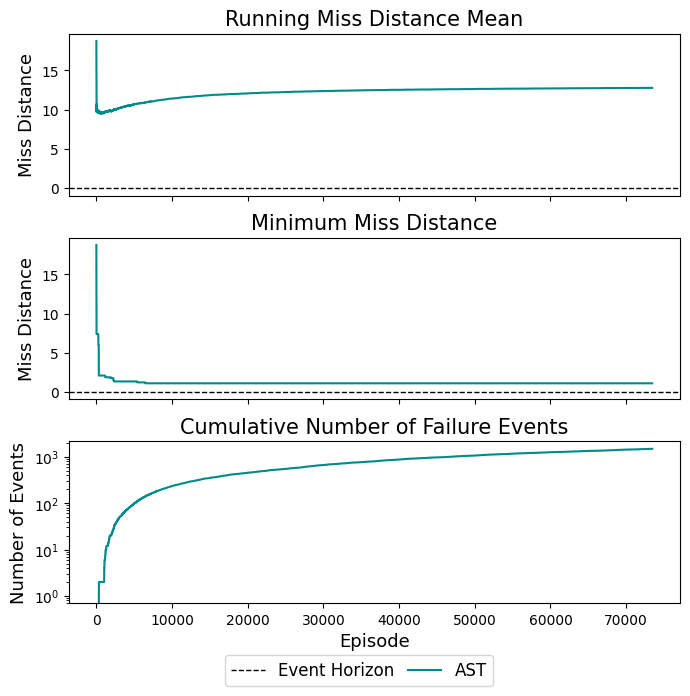

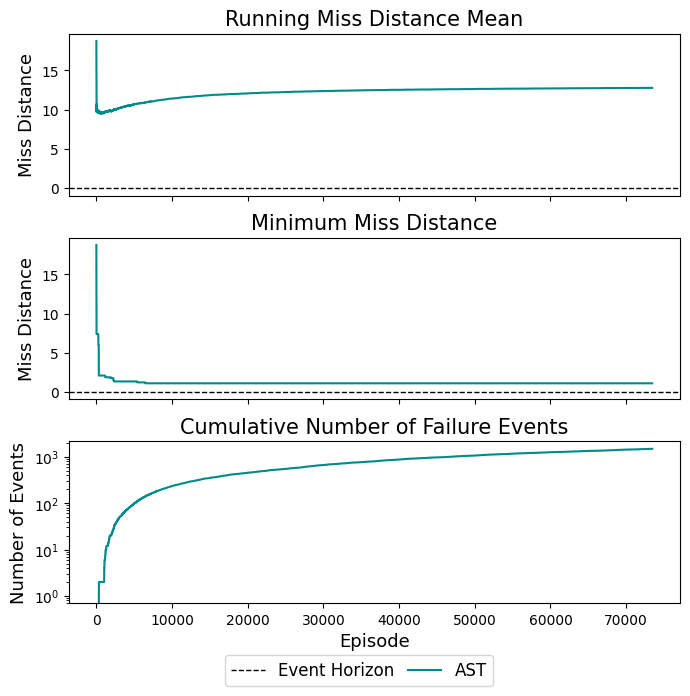

In [193]:
episodic_figures(planner.mdp, gui=false); POMDPStressTesting.gcf()

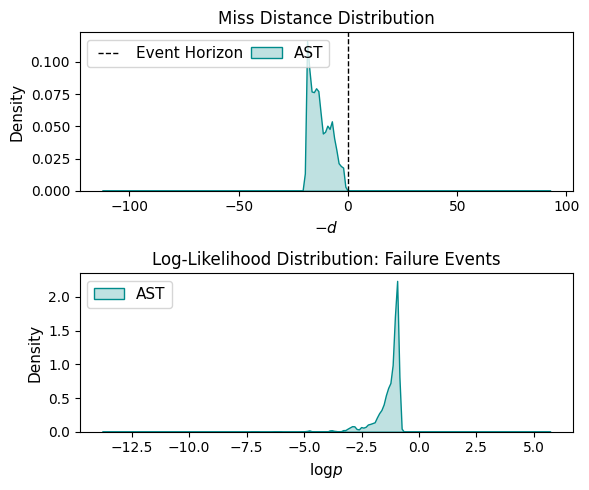

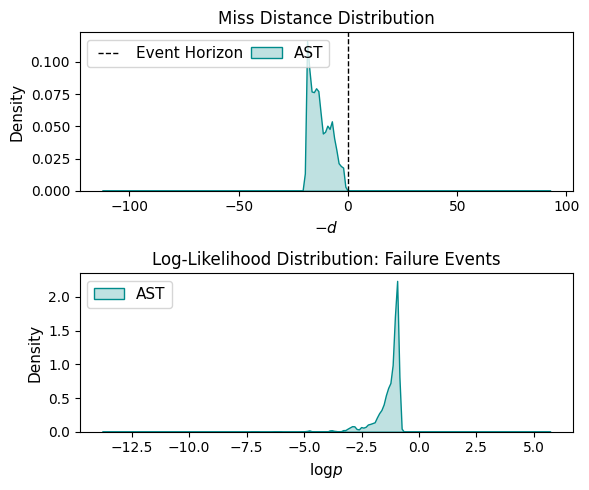

In [194]:
distribution_figures(planner.mdp, gui=false); POMDPStressTesting.gcf()

In [195]:
playback_trace = playback(planner, action_trace, BlackBox.distance, return_trace=true)

20.22374841615668
18.75518661597372
17.375626607406126
16.085055952653686
14.82415596248231
13.53359615918843
12.213369723381005
10.863472050868445
9.483902150486363
8.074665627752017
6.635781792675215
5.167303455381723
3.669386869764475
2.14266772972385


14-element Array{Any,1}:
 20.22374841615668
 18.75518661597372
 17.375626607406126
 16.085055952653686
 14.82415596248231
 13.53359615918843
 12.213369723381005
 10.863472050868445
  9.483902150486363
  8.074665627752017
  6.635781792675215
  5.167303455381723
  3.669386869764475
  2.14266772972385

In [196]:
failure_rate = print_metrics(planner)

First failure: 316 of 73457
Number of failures: 1480
Failure rate: 2.01478%


2.0147841594402167

In [197]:
begin
    # TODO: get this index from the `trace` itself
    # findmax(planner.mdp.metrics.reward[planner.mdp.metrics.event])
    # findmax(ast_mdp.metrics.reward[ast_mdp.metrics.event])

    failure_likelihood =
        round(exp(maximum(planner.mdp.metrics.logprob[planner.mdp.metrics.event])), digits=4)

    Markdown.parse(string("\$\$p = ", failure_likelihood, "\$\$"))
end

$$
p = 0.3989
$$


In [198]:
playback_trace = playback(planner, action_trace, sim->sim.state, return_trace=true)

Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)


14-element Array{Any,1}:
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)
 Scene{Entity{S,VehicleDef,Int64} where S}(2 entities)

In [199]:
# t = 10
@manipulate for t=1:length(playback_trace)
    AutomotiveVisualization.render([planner.mdp.sim.problem.roadway, crosswalk, playback_trace[t]])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 14,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
7, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/scratch/users/shubhgup/julia/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/scratch/users/shubhgup/julia/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/scratch/users/shubhgup/julia/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/scratch/users/shubhgup/julia/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/scratch/users/shubhgup/julia/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007ffa594e7a90, Task (runnable) @0x00007ffa594e7a90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"172850196458936

### Rough

In [25]:
meas = AdversarialDriving.measure_gps(ped_state, [0.0, 0.0, 0.0, 0.0])

4-element Array{Union{Missing, AdversarialDriving.GPSRangeMeasurement},1}:
 AdversarialDriving.GPSRangeMeasurement
  range: Float64 1744.8879620193384
  noise: Float64 0.0

 AdversarialDriving.GPSRangeMeasurement
  range: Float64 1715.9935897316168
  noise: Float64 0.0

 AdversarialDriving.GPSRangeMeasurement
  range: Float64 1748.3231966658795
  noise: Float64 0.0

 AdversarialDriving.GPSRangeMeasurement
  range: Float64 1719.4865512704657
  noise: Float64 0.0


In [203]:
AdversarialDriving.localize(ped_state, [meas], planner.mdp.sim.problem.roadway)

LoadError: MethodError: no method matching localize(::Entity{NoisyPedState,VehicleDef,Int64}, ::Array{Array{Union{Missing, AdversarialDriving.GPSRangeMeasurement},1},1}, ::Roadway{Float64})
Closest candidates are:
  localize(::Entity, !Matched::Array{Array{Union{Missing, AdversarialDriving.GPSRangeMeasurement},N} where N,N} where N, ::Roadway) at /home/users/shubhgup/Codes/julia_learn/scripts/AdversarialDriving.jl/src/driving_models.jl:273